In [21]:
import os
import sys
sys.path.append("../")
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow.keras.backend as K
import tensorflow as tf
from glob import glob
from tqdm import trange
from typing import List,Tuple
#from data_processing.data_loader import dataset_loader
from data_processing.data_loader_costmap  import dataset_loader

from losses import euclidean_distance_loss,endpoint_loss
from models import endpoint_in_model,conv1x1_endpoint_in_model,coordconv1x1_endpoint_in_model
from matplotlib import pyplot as plt
import numpy as np
from config import params,generalization_model_params as g_params
import json 
print(tf.__version__)

os.environ['CUDA_VISIBLE_DEVICES']="0"
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))



2.3.0
Num GPUs Available:  1


In [22]:
dataset_dir = '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records'
dataset_dir='/bigpool/projects/yao_SCANGAN360/New_Folder/tf_records_w_costmap_dist_dir'
ds_loader = dataset_loader(tfrec_dir=params.get("dataset_dir"), batch_size=32,normalize_coords=True,normalize_factor=1536.0)
#ds_train, ds_valid, ds_test = ds_loader.build_dataset()
#ds_train, ds_valid, ds_test = ds_loader.build_scenario_dataset(consider_scenes=10,no_train_scene=8,no_valid_scene=1,no_test_scene=1)
ds_train, ds_valid, ds_test = ds_loader.build_scenario_dataset(consider_scenes=10,no_train_scene=8,no_valid_scene=1,no_test_scene=1)
#ds_train, ds_valid, ds_test = ds_loader.build_scenario_dataset(consider_scenes=13,no_train_scene=10,no_valid_scene=1,no_test_scene=2)


Scenarios:['/bigpool/projects/yao_SCANGAN360/New_Folder/tf_records_w_costmap_dist_dir/scenario1', '/bigpool/projects/yao_SCANGAN360/New_Folder/tf_records_w_costmap_dist_dir/scenario2', '/bigpool/projects/yao_SCANGAN360/New_Folder/tf_records_w_costmap_dist_dir/scenario3', '/bigpool/projects/yao_SCANGAN360/New_Folder/tf_records_w_costmap_dist_dir/scenario4', '/bigpool/projects/yao_SCANGAN360/New_Folder/tf_records_w_costmap_dist_dir/scenario5', '/bigpool/projects/yao_SCANGAN360/New_Folder/tf_records_w_costmap_dist_dir/scenario_ph_11', '/bigpool/projects/yao_SCANGAN360/New_Folder/tf_records_w_costmap_dist_dir/scenario_ph_12', '/bigpool/projects/yao_SCANGAN360/New_Folder/tf_records_w_costmap_dist_dir/scenario_ph_13', '/bigpool/projects/yao_SCANGAN360/New_Folder/tf_records_w_costmap_dist_dir/scenario_ph_14', '/bigpool/projects/yao_SCANGAN360/New_Folder/tf_records_w_costmap_dist_dir/scenario_ph_15']
Building Dataset.......

Number of records, Train files:610, validation files:109, Test Files:

In [23]:
#pp_model = endpoint_in_model.nn()
#pp_model = conv1x1_endpoint_in_model.nn(full_skip= g_params.get("full_skip"),params=params)
#pp_model = coordconv1x1_endpoint_in_model.nn(full_skip= g_params.get("full_skip"),params=params)

In [24]:
#pp_model=tf.keras.models.load_model('/netpool/work/gpu-3/users/malyalasa/New_folder/wandb/run-20210625_053926-21xquqgr/files/model-best.h5',compile=False)

#pp_model.load_weights('/netpool/work/gpu-3/users/malyalasa/New_folder/wandb/run-20210629_204919-3446nhcb/files/model-best.h5')

#pp_model.load_weights('/netpool/work/gpu-3/users/malyalasa/New_folder/rosbag2numpy/keras_weights.h5')
#pp_model = tf.keras.models.load_model('/netpool/work/gpu-3/users/malyalasa/New_folder/wandb/latest-run/files/model-best.h5',compile=False,custom_objects={'CustomMaskLayer':endpoint_in_model.CustomMaskLayer})

#best
#pp_model=tf.keras.models.load_model('/netpool/work/gpu-3/users/malyalasa/New_folder/wandb/run-20210627_124548-3rs0bk0s/files/model-best.h5',compile=False,custom_objects={'CustomMaskLayer':endpoint_in_model.CustomMaskLayer})

#pp_model = tf.keras.models.load_model('/netpool/work/gpu-3/users/malyalasa/New_folder/wandb/run-20210629_204919-3446nhcb/files/model-best.h5',compile=False,custom_objects={'CustomMaskLayer':endpoint_in_model.CustomMaskLayer})

#strategy = tf.distribute.MirroredStrategy()
#print(f'Number of replicas in sync {strategy.num_replicas_in_sync}')

#with strategy.scope():

model_path = '/netpool/work/gpu-3/users/malyalasa/New_folder/wandb/run-20210803_082524-3uuugyrv/files/model-best.h5'
model_path = '/netpool/work/gpu-3/users/malyalasa/New_folder/wandb/run-20210802_001003-3sfy6y4y/files/model-best.h5'
model_path= '/netpool/work/gpu-3/users/malyalasa/New_folder/wandb/run-20210801_153341-2rhr44fy/files/model-best.h5'
model_path = '/netpool/work/gpu-3/users/malyalasa/New_folder/wandb/run-20210825_082307-357bd5u9/files/model-best.h5'
model_path = '/netpool/work/gpu-3/users/malyalasa/New_folder/wandb/run-20210826_160846-2zharwo1/files/model-best.h5' #LSTM

model_path = dense_model = '/netpool/work/gpu-3/users/malyalasa/New_folder/wandb/run-20210831_200338-yg1rkqpw/files/model-best.h5'
#pp_model = keras.models.load_model(model_path,compile=False,custom_objects={'CustomMaskLayer':endpoint_in_model.CustomMaskLayer})
pp_model = keras.models.load_model(model_path,compile=False)

#pp_model = tf.keras.models.load_model('/netpool/work/gpu-3/users/malyalasa/New_folder/wandb/run-20210709_111150-1dpjz991/files/model-best.h5',compile=False,custom_objects={'CustomMaskLayer':endpoint_in_model.CustomMaskLayer})

opt = tf.keras.optimizers.Adam(learning_rate=0.02)
pp_model.compile(
        optimizer=opt, 
        loss=params.get("losses"),#[euclidean_distance_loss,endpoint_loss],
        loss_weights=params.get("loss_weights"), metrics=params.get("metric")
    )
    
pp_model.summary()
test_loss,test_accuracy = pp_model.evaluate(ds_test)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 1536, 1536,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 767, 767, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 767, 767, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 767, 767, 16) 64          leaky_re_lu[0][0]                
_______________________________________________________________________________________

## Saving keras model

In [5]:
# Saving keras models
#step 1
# serialize model to json(no weights, only structure)
"""
with open('best_model.json','w') as f:
    f.write(pp_model.to_json())
"""
#step 2
"""
pp_model.save_weights('best_keras_weights.h5')
"""

#step 3
# Load serialized model from json(contains no weights only structue)

"""json_file = open('best_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
pp_model = tf.keras.models.model_from_json(loaded_model_json,custom_objects={'CustomMaskLayer':endpoint_in_model.CustomMaskLayer})
"""
#step4
# load weights into model created from json

"""pp_model.load_weights('/netpool/work/gpu-3/users/malyalasa/New_folder/rosbag2numpy/keras_weights.h5')
"""


"""
opt = tf.keras.optimizers.Adam(learning_rate=0.02)
pp_model.compile(
        optimizer=opt, 
        loss=[euclidean_distance_loss,endpoint_loss],
        loss_weights=params.get("loss_weights"), metrics=params.get("metric")
    )#pp_model.summary()
test_loss,test_accuracy = pp_model.evaluate(ds_test)
"""



'\nopt = tf.keras.optimizers.Adam(learning_rate=0.02)\npp_model.compile(\n        optimizer=opt, \n        loss=[euclidean_distance_loss,endpoint_loss],\n        loss_weights=params.get("loss_weights"), metrics=params.get("metric")\n    )#pp_model.summary()\ntest_loss,test_accuracy = pp_model.evaluate(ds_test)\n'

In [25]:
%%time
from time import time
start = time()
predictions = pp_model.predict(ds_test)
end = time()
print(f"LAtency: {end-start}")
#np.shape(predictions)

LAtency: 2.4291462898254395
CPU times: user 37 s, sys: 10.9 s, total: 47.9 s
Wall time: 2.43 s


In [26]:
def get_test_ds_size(ds_test):
    num_of_samples=0
    for input_batch, output_batch in ds_test:
        for i in range(0,len(input_batch[0].numpy())):
            num_of_samples+=1
    return num_of_samples

def get_np_test_ds(ds_test):

    samples = get_test_ds_size(ds_test)
    np_tst_gridmap = np.zeros(shape=(samples,1536,1536))
    np_tst_grid_org_res = np.zeros(shape=(samples,3))
    np_tst_left_bnd = np.zeros(shape=(samples,25,2))
    np_tst_right_bnd = np.zeros(shape=(samples,25,2))
    np_tst_car_odo = np.zeros(shape=(samples,3))
    np_tst_init_path = np.zeros(shape=(samples,25,2))
    np_tst_opt_path = np.zeros(shape=(samples,25,2))
    list_tst_file_details = []

    j=0
    for input_batch, output_batch in ds_test:
        
        for i in range(0,len(input_batch[0].numpy())):
            np_tst_gridmap[j]=input_batch[0][i].numpy()
            np_tst_grid_org_res[j] = input_batch[1][i].numpy()
            np_tst_left_bnd[j] = input_batch[2][i].numpy()
            np_tst_right_bnd[j] = input_batch[3][i].numpy()
            np_tst_car_odo[j] = input_batch[4][i].numpy()
            np_tst_init_path[j] = input_batch[5][i].numpy()
            list_tst_file_details.append(input_batch[6][i])

            np_tst_opt_path[j] = output_batch[i].numpy()
            j=j+1   
    return np_tst_gridmap,np_tst_grid_org_res,np_tst_left_bnd,np_tst_right_bnd,np_tst_car_odo,np_tst_init_path,list_tst_file_details,np_tst_opt_path

In [27]:
#get numpy arrays of input test data

np_tst_gridmap,np_tst_grid_org_res,np_tst_left_bnd,np_tst_right_bnd,np_tst_car_odo,np_tst_init_path,list_tst_file_details,np_tst_opt_path =get_np_test_ds(ds_test)


In [9]:
#save test dataset to numpy array

"""
np.savez_compressed("test_dataset_allscene",
np_tst_gridmap=np_tst_gridmap,
np_tst_grid_org_res=np_tst_grid_org_res,
np_tst_left_bnd,=np_tst_left_bnd
np_tst_right_bnd,=np_tst_right_bnd
np_tst_car_odo,=np_tst_car_odo
np_tst_init_path,=np_tst_init_path
list_tst_file_details,=list_tst_file_details
np_tst_opt_path)=np_tst_opt_path"""



'\nnp.savez_compressed("test_dataset_allscene",\nnp_tst_gridmap=np_tst_gridmap,\nnp_tst_grid_org_res=np_tst_grid_org_res,\nnp_tst_left_bnd,=np_tst_left_bnd\nnp_tst_right_bnd,=np_tst_right_bnd\nnp_tst_car_odo,=np_tst_car_odo\nnp_tst_init_path,=np_tst_init_path\nlist_tst_file_details,=list_tst_file_details\nnp_tst_opt_path)=np_tst_opt_path'

In [32]:
#plot all inputs on gridmap(also an input)

def plot_scene(features,normalized_coords:bool=True,normalized_factor = 1):    
    grid_map = features["grid_map"]
    grid_org = features["grid_org_res"] #[x,y,resolution]
    left_bnd = features["left_bnd"]
    right_bnd = features["right_bnd"]
    init_path = features["init_path"]
    opt_path = features["opt_path"]
    car_odo = features["car_odo"]

    predict_path = features["predictions"]
    file_details=features["file_details"]

    #print(type(grid_map))
    
    plt.figure(figsize=(10, 10))
    #ax=fig.add_subplot(1,1,1)
    if normalized_coords:
        #res = grid_org[2]
            plt.plot(
                left_bnd[:, 0]*normalized_factor,
                left_bnd[:, 1]*normalized_factor,
                "-.",
                color="magenta",
                markersize=0.5,
                linewidth=0.5,
            )

            plt.plot(
                init_path[:, 0]*normalized_factor,
                init_path[:, 1]*normalized_factor,
                "o-",
                color="lawngreen",
                markersize=1,
                linewidth=1,
            )
            plt.plot(
                opt_path[:, 0]*normalized_factor,
                opt_path[:, 1]*normalized_factor,
                "--",
                color="yellow",
                markersize=1,
                linewidth=1,
            )
            
            plt.plot(
                predict_path[:, 0]*normalized_factor,
                predict_path[:, 1]*normalized_factor,
                "--",
                color="orange",
                markersize=1,
                linewidth=1,
            )

            plt.plot(
                right_bnd[:, 0]*normalized_factor,
                right_bnd[:, 1]*normalized_factor,
                "-.",
                color="magenta",
                markersize=0.5,
                linewidth=0.5,
            )

            plt.plot(
                car_odo[0]*normalized_factor,
                car_odo[1]*normalized_factor,
                "r*",
                color="red",
                markersize=8,
            )
 


    else:
        res = grid_org[2]
        plt.plot((left_bnd[:,0]-grid_org[0])/res,(left_bnd[:,1]-grid_org[1])/res,'-.', color='magenta',markersize=0.5, linewidth=0.5)

        plt.plot((init_path[:,0]-grid_org[0])/res,(init_path[:,1]-grid_org[1])/res,'o-', color='lawngreen',markersize=1, linewidth=1)

        plt.plot((opt_path[:,0]-grid_org[0])/res,(opt_path[:,1]-grid_org[1])/res,'--', color='yellow',markersize=1, linewidth=1)

        plt.plot((predict_path[:,0]-grid_org[0])/res,(predict_path[:,1]-grid_org[1])/res,'--', color='orange',markersize=1, linewidth=1)

        plt.plot((right_bnd[:,0]-grid_org[0])/res,(right_bnd[:,1]-grid_org[1])/res, '-.',color='magenta',markersize=0.5, linewidth=0.5)

        plt.plot((car_odo[0]-grid_org[0])/res,(car_odo[1]-grid_org[1])/res,'r*', color = 'red',markersize=8)
        #print((car_odo[0]-grid_org[0])/res,(car_odo[1]-grid_org[1])/res)

    plt.legend(['Left bound', 'gt_init_path', 'gt_opt_path','predicted_path','right bound', 'car_centre'], loc='lower left')

    plt.imshow(grid_map,origin="lower")

    

    plt.title(f"{file_details}\nTest Index: {features['testidx']}")
    #save_fig_dir = '/netpool/work/gpu-3/users/malyalasa/New_folder/rosbag2numpy/test_results/all_testset_results'
    
    root_dir = '/netpool/work/gpu-3/users/malyalasa/New_folder/rosbag2numpy/test_results/after_normalization'
    model_name = model_path.split('/')[-3]
    scene_dir = os.path.split(file_details.numpy().decode("utf-8"))[0]
    scene_dir = os.path.split(scene_dir)[0]
    save_dir=os.path.join(root_dir,model_name,scene_dir)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    plt.savefig(f"{save_dir}/Test_index_{features['testidx']}.png",dpi=200)
    
    #plt.show()
    plt.close()
    
    #print(type(file_details))

    #return ax,fig

    """
    print((init_path[:,0]-grid_org[0])/res,(init_path[:,1]-grid_org[1])/res)
    print((predict_path[:,0]-grid_org[0])/res,(predict_path[:,1]-grid_org[1])/res)
    """



In [29]:
print(len(predictions[0:5]))

5


In [33]:
#test_idx= 12#120#400#1400#200#250#143#1400#320#143#143#250#12#250#10#15#143#12#785#1000#28#530#143#120#15#1300#530#320#50#1050
%matplotlib agg
for test_idx in trange(0,len(predictions)):
    test_data = {
        "grid_map": np_tst_gridmap[test_idx],
        "grid_org_res": np_tst_grid_org_res[test_idx],
        "left_bnd": np_tst_left_bnd[test_idx],
        "right_bnd": np_tst_right_bnd[test_idx],
        "car_odo": np_tst_car_odo[test_idx],
        "init_path": np_tst_init_path[test_idx],
        "opt_path": np_tst_opt_path[test_idx],
        "predictions": predictions[test_idx],
        "file_details": list_tst_file_details[test_idx],
        "testidx": test_idx,
    }

    #print(test_data["left_bnd"])
    plot_scene(test_data,normalized_coords=True, normalized_factor = 1536)
#np_tst_gridmap[test_idx]


100%|██████████| 1458/1458 [13:47<00:00,  1.76it/s]


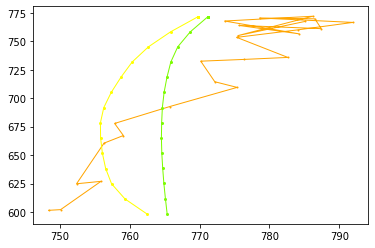

[[765.36505127 598.55456543]
 [765.11920166 611.87591553]
 [764.89776611 625.19769287]
 [764.73114014 638.52020264]
 [764.60266113 651.84313965]
 [764.54608154 665.16662598]
 [764.5814209  678.48999023]
 [764.68414307 691.81298828]
 [764.93261719 705.13409424]
 [765.34423828 718.45043945]
 [765.89428711 731.76165771]
 [766.8805542  745.04718018]
 [768.67077637 758.21044922]
 [771.15014648 771.26885986]
 [771.15014648 771.26885986]
 [771.15014648 771.26885986]
 [771.15014648 771.26885986]
 [771.15014648 771.26885986]
 [771.15014648 771.26885986]
 [771.15014648 771.26885986]
 [771.15014648 771.26885986]
 [771.15014648 771.26885986]
 [771.15014648 771.26885986]
 [771.15014648 771.26885986]
 [771.15014648 771.26885986]]


In [14]:
plt.plot(predictions[test_idx][:,0],predictions[test_idx][:,1],'-o', color = 'orange', markersize=1, linewidth=1)
plt.plot(np_tst_init_path[test_idx][:,0],np_tst_init_path[test_idx][:,1],'-o', color='lawngreen',markersize=2, linewidth=1)
plt.plot(np_tst_opt_path[test_idx][:,0],np_tst_opt_path[test_idx][:,1],'-o', color='yellow',markersize=2, linewidth=1)
plt.show()

print(np_tst_init_path[test_idx])

## Scenario based dataset creation

In [1]:
from glob import glob
import random
import numpy as np
path ='/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records'
scenario_list = glob(f"{path}/*")
scenario_list

['/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario1',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario2',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario3',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario4',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario5',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario6',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario7',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario8']

In [2]:
random.Random(2021).shuffle(scenario_list)
scenario_list


['/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario2',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario4',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario1',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario3',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario5',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario6',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario8',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario7']

In [10]:
def collect_tfrec_paths(list_dir):
    assert len(list_dir)>=1
    if len(list_dir)>1 :
        list_in_list= [glob(f"{fold_path}/**/*.tfrec", recursive=True) for fold_path in list_dir]
        flat_list = (np.concatenate(list_in_list).tolist())
    else:

        flat_list=glob(f"{list_dir[0]}/**/*.tfrec", recursive=True)
    return flat_list


In [11]:
len(collect_tfrec_paths(scenario_list[0:6]))

450

In [12]:
scenario_list[0]
glob(f"{scenario_list[0]}/**/*.tfrec", recursive=True)

['/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario1/2021-06-10_08-54-06/2021-06-10_08-54-07_0_file_00-16.tfrec',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario1/2021-06-10_08-54-06/2021-06-10_08-54-07_0_file_01-16.tfrec',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario1/2021-06-10_08-54-06/2021-06-10_08-54-07_0_file_02-16.tfrec',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario1/2021-06-10_08-54-06/2021-06-10_08-54-07_0_file_03-16.tfrec',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario1/2021-06-10_08-54-06/2021-06-10_08-54-07_0_file_04-16.tfrec',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario1/2021-06-10_08-54-06/2021-06-10_08-54-07_0_file_05-15.tfrec',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario1/2021-06-10_08-54-06/2021-06-10_08-55-07_1_file_00-16.tfrec',
 '/netpool/work/gpu-3/users/malyalasa/New_folder/tf_records/scenario1/2021-06-10_08

In [13]:
len(collect_tfrec_paths(scenario_list[6:7]))

86

In [15]:
len(collect_tfrec_paths(scenario_list[7:8]))

47